In [1]:
import nltk

In [2]:
help(nltk)

Help on package nltk:

NAME
    nltk

DESCRIPTION
    The Natural Language Toolkit (NLTK) is an open source Python library
    for Natural Language Processing.  A free online book is available.
    (If you use the library for academic research, please cite the book.)
    
    Steven Bird, Ewan Klein, and Edward Loper (2009).
    Natural Language Processing with Python.  O'Reilly Media Inc.
    http://nltk.org/book
    
    @version: 3.5

PACKAGE CONTENTS
    app (package)
    book
    ccg (package)
    chat (package)
    chunk (package)
    classify (package)
    cli
    cluster (package)
    collections
    collocations
    compat
    corpus (package)
    data
    decorators
    downloader
    draw (package)
    featstruct
    grammar
    help
    inference (package)
    internals
    jsontags
    lazyimport
    lm (package)
    metrics (package)
    misc (package)
    parse (package)
    probability
    sem (package)
    sentiment (package)
    stem (package)
    tag (package)
    tb

In [3]:
#Importing necessary Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
# import train_tweets.csv and test_tweets.csv data
data = pd.read_csv('/home/user/Downloads/Twitter Data.csv')

In [5]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [6]:
#Downloading essential datasets from nltk
import nltk 
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /home/user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# PREPROCESSING

In [7]:
#Seperating tweets from appended data
#this 'tweets' contains the tweets from train and test data
tweets = data.tweet
tweets

0       #fingerprint #Pregnancy Test https://goo.gl/h1...
1       Finally a transparant silicon case ^^ Thanks t...
2       We love this! Would you go? #talk #makememorie...
3       I'm wired I know I'm George I was made that wa...
4       What amazing service! Apple won't even talk to...
                              ...                        
7915    Live out loud #lol #liveoutloud #selfie #smile...
7916    We would like to wish you an amazing day! Make...
7917    Helping my lovely 90 year old neighbor with he...
7918    Finally got my #smart #pocket #wifi stay conne...
7919    Apple Barcelona!!! #Apple #Store #BCN #Barcelo...
Name: tweet, Length: 7920, dtype: object

# TOKENIZATION

In [8]:
#tokenizing the data and then joining it back together 
from nltk import TweetTokenizer
tk = TweetTokenizer()
tweets = tweets.apply(lambda x: tk.tokenize(x)).apply(lambda x: ' '.join(x))

In [9]:
tweets

0       #fingerprint #Pregnancy Test https://goo.gl/h1...
1       Finally a transparant silicon case ^ ^ Thanks ...
2       We love this ! Would you go ? #talk #makememor...
3       I'm wired I know I'm George I was made that wa...
4       What amazing service ! Apple won't even talk t...
                              ...                        
7915    Live out loud #lol #liveoutloud #selfie #smile...
7916    We would like to wish you an amazing day ! Mak...
7917    Helping my lovely 90 year old neighbor with he...
7918    Finally got my #smart #pocket #wifi stay conne...
7919    Apple Barcelona ! ! ! #Apple #Store #BCN #Barc...
Name: tweet, Length: 7920, dtype: object

# REMOVING PUNCTUATIONS

In [10]:
#Replacing symbols and punctuations from tweets
tweets = tweets.str.replace('[^a-zA-Z]+', ' ')
tweets

0        fingerprint Pregnancy Test https goo gl h MfQ...
1       Finally a transparant silicon case Thanks to m...
2       We love this Would you go talk makememories un...
3       I m wired I know I m George I was made that wa...
4       What amazing service Apple won t even talk to ...
                              ...                        
7915    Live out loud lol liveoutloud selfie smile son...
7916    We would like to wish you an amazing day Make ...
7917    Helping my lovely year old neighbor with her i...
7918    Finally got my smart pocket wifi stay connecte...
7919    Apple Barcelona Apple Store BCN Barcelona trav...
Name: tweet, Length: 7920, dtype: object

# REMOVING SHORTWORDS

In [11]:
from nltk.tokenize import word_tokenize
#Removing small words from the tweets (words which has length <3)
tweets = tweets.apply(lambda x: ' '.join([w for w in word_tokenize(x) if len(w) >= 3]))

In [12]:
tweets

0       fingerprint Pregnancy Test https goo MfQV andr...
1       Finally transparant silicon case Thanks uncle ...
2       love this Would you talk makememories unplug r...
3       wired know George was made that way iphone cut...
4       What amazing service Apple won even talk about...
                              ...                        
7915    Live out loud lol liveoutloud selfie smile son...
7916    would like wish you amazing day Make every min...
7917    Helping lovely year old neighbor with her iPad...
7918    Finally got smart pocket wifi stay connected a...
7919    Apple Barcelona Apple Store BCN Barcelona trav...
Name: tweet, Length: 7920, dtype: object

# STEMMING

In [13]:
#Stemming the tweets
from nltk.stem import SnowballStemmer 
stemmer = SnowballStemmer('english')
tweets = tweets.apply(lambda x: [stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x: ' '.join(x))

In [14]:
tweets

0       fingerprint pregnanc test https goo mfqv andro...
1       final transpar silicon case thank uncl yay son...
2       love this would you talk makememori unplug rel...
3       wire know georg was made that way iphon cute d...
4       what amaz servic appl won even talk about ques...
                              ...                        
7915    live out loud lol liveoutloud selfi smile soni...
7916    would like wish you amaz day make everi minut ...
7917    help love year old neighbor with her ipad this...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

# REMOVING STOP WORDS

In [15]:
#Removing stopwords from the tweets
from nltk.corpus import stopwords 
stop = stopwords.words('english')
tweets = tweets.apply(lambda x: [i for i in word_tokenize(x) if i not in stop]).apply(lambda x: ' '.join(x))

In [16]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
len(stop)

179

In [18]:
tweets

0       fingerprint pregnanc test https goo mfqv andro...
1       final transpar silicon case thank uncl yay son...
2       love would talk makememori unplug relax iphon ...
3       wire know georg made way iphon cute daventri h...
4       amaz servic appl even talk question unless pay...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [19]:
#Replacing tweets columns from the merged data with processed tweets data
data.tweet = tweets
data

,id,label,tweet
0,1,0,fingerprint pregnanc test https goo mfqv andro...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would talk makememori unplug relax iphon ...
3,4,0,wire know georg made way iphon cute daventri h...
4,5,1,amaz servic appl even talk question unless pay...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


# TFIDF VECTORIZATION

In [20]:
#Vectorizing the tweets using TFIDFVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(stop_words = stop)
data_vec = vec.fit_transform(tweets)

In [21]:
data.shape

(7920, 3)

In [22]:
data_vec

<7920x19643 sparse matrix of type '<class 'numpy.float64'>'
	with 103974 stored elements in Compressed Sparse Row format>

In [23]:
#Seperating label y from the train_data
y = data.label
type(y)

pandas.core.series.Series

In [24]:
y = y.values
type(y)

numpy.ndarray

In [25]:
#Value counts of 0 and 1 to check the imbalance of the data
pd.Series(y).value_counts()

0    5894
1    2026
dtype: int64

# SPLITTING TRAIN AND TEST DATA

In [26]:
#Splitting the train data into X_train, y_train (train_set), X_test, y_test (test_set)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_vec, y, test_size = 0.2, stratify = y,random_state=42)

In [27]:
X_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
#Oversampling the train_set to overcome imbalanced data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)

# LOGISTIC REGRESSION

In [29]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()
model.fit(X_res, y_res)
y_pred = model.predict(X_test)

In [30]:
y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [31]:
y_test

array([1, 0, 0, ..., 0, 0, 0])

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8882575757575758

# RANDOM FOREST CLASSIFIER

In [33]:
#Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(X_res, y_res)
y_pred2 = model2.predict(X_test)

In [34]:
y_pred2

array([1, 0, 0, ..., 0, 0, 1])

In [35]:
y_test

array([1, 0, 0, ..., 0, 0, 0])

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred2)

0.889520202020202

# XGB CLASSIFIER

In [37]:
#XGBClassifier
from xgboost import XGBClassifier 
model3 = XGBClassifier()
model3.fit(X_res, y_res)
y_pred3 = model3.predict(X_test)

/home/user/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:58:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [38]:
y_pred3

array([1, 0, 0, ..., 0, 0, 1])

In [39]:
y_test

array([1, 0, 0, ..., 0, 0, 0])

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred3)

0.8819444444444444

# SUPPORT VECTOR MACHINE

In [41]:
#SVC - Supoprt Vector Classifier
from sklearn.svm import SVC  
model4= SVC()
model4.fit(X_res,y_res)
y_pred4 = model4.predict(X_test)

In [42]:
y_pred4

array([1, 0, 0, ..., 0, 0, 0])

In [43]:
y_test

array([1, 0, 0, ..., 0, 0, 0])

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred4)

0.8964646464646465

# K-NEAREST NEIGHBOUR

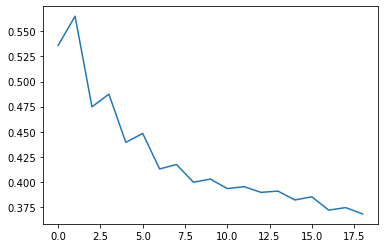

In [47]:
#NN classsifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

score = []
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_res, y_res)
    y_pred = knn.predict(X_test)
    score_1 = accuracy_score(y_test, y_pred)
    score.append(score_1)
plt.plot(score)
plt.show()

# HYPER PARAMETER TUNING -LOGISTIC REGRESSION

In [48]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, KFold
kf = KFold(n_splits = 10, shuffle = True) #here we are creating 10 folds 

#d1,d2,d3,d4,d5,d6,d7,d8,d9,d10





params = {'C':[0.0001, 0.001, 0.01, 0.1, 1, 1, 2, 3, 4, 5, 10, 20, 50],
          'tol':[1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]}

          
cls = LogisticRegression()
search = GridSearchCV(cls, params, cv = kf.split(data_vec, y), n_jobs = -1, scoring = 'f1')  #cv - cross validation
search.fit(data_vec, y)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x7fce09f2beb0>,
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 1, 2, 3, 4, 5, 10,
                               20, 50],
                         'tol': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
             scoring='f1')

since K fold = 10

There will be 10 iterations

Ite 1:

Testing Data : d1

Training Data : d2 - d10

Ite 2:

Testing Data : d2

Training Data : d1,d3 - d10


In [49]:
pred = model.predict(X_test)

In [50]:
pred

array([1, 0, 0, ..., 0, 0, 1])

In [51]:
search.best_estimator_

LogisticRegression(C=5, tol=1)

In [52]:
search.best_score_

0.7713418866545478

In [53]:
#End